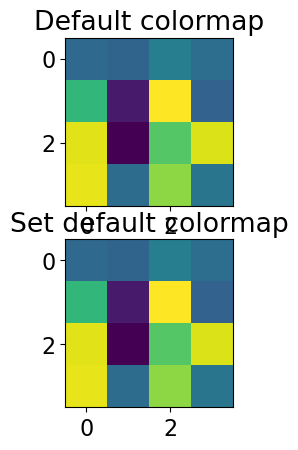

In [1]:
import os
import random
import sys
import time

import numpy as np
sys.path.append(os.path.join(os.path.abspath(".."), "code"))

import matplotlib.pyplot as plt
from plotting_functions import *
from plotting_functions_unsup import *
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.preprocessing import StandardScaler

plt.rcParams["font.size"] = 16
import matplotlib.cm as cm

# plt.style.use("seaborn")
%matplotlib inline
pd.set_option("display.max_colwidth", 0)

# Lecture 17: Recommender Systems

UBC 2025

Instructor: Andrew Roth

## Learning outcomes <a name="lo"></a>

From this lecture, students are expected to be able to:

- State the problem of recommender systems. 
- Describe components of a utility matrix. 
- Create a utility matrix given ratings data. 
- Describe a common approach to evaluate recommender systems. 
- Implement some baseline approaches to complete the utility matrix. 
- Explain the idea of collaborative filtering.
- Formulate the rating prediction problem as a supervised machine learning problem. 
- Create a content-based filter given ratings data and item features to predict missing ratings in the utility matrix.  
- Explain some serious consequences of recommendation systems.

## Recommender systems motivation

## ❓❓ Questions for you

What percentage of watch time on YouTube do you think comes from recommendations?
- (A) 50%
- (B) 60%
- (C) 20%
- (D) 90%

This [source](https://developers.google.com/machine-learning/recommendation/overview) says 60%. But the statistics might have changed now. 

### What is a recommender system? 

- A recommender or a recommendation system **recommends** a particular product or service to users they are likely to consume. 

<img src="../img/recommendation_system.png" alt="" height="900" width="900">


### Example: Recommender Systems
- A client goes to Amazon to buy products. 
- Amazon has some information about the client. They also have information about other clients buying similar products. 
- What should they recommend to the client, so that they buy more products? 
- There's no "right" answer (no label). 
- The whole idea is to understand user behavior in order to recommend them products they are likely to consume. 

### Why should we care about recommendation systems? 

- Almost everything we buy or consume today is in some way or the other influenced by recommendation systems. 
    - Music (Spotify), videos (YouTube), news, books and products (Amazon), movies (Netflix), jokes, restaurants, dating , friends (Facebook), professional connections (Linkedin)
- Recommendation systems are at the core of the success of many companies. 
    - Amazon
    - [Netflix](https://help.netflix.com/en/node/100639)

- Recommendation systems are often presented as powerful tools that significantly **reduce the effort users need to put in finding items**, effectively mitigating the problem of information overload.

- This is more or less true in many contexts. Consider, for instance, the experience of shopping an umbrella on Amazon without the help of recommendations or any specific ranking of products.
  
- In the absence of a recommendation system, users would be faced with the daunting task of sifting through thousands of available products to find the one that best suits their needs.

![](../img/info-overload.png)- 

### Why should we care about recommendation systems? 

- That said, we should always be mindful of the drawbacks of relying heavily on recommender systems.
  
- For example, these systems tend to recommend articles and products that are similar to those a user has previously interacted with or those their friends like.
  
- While this can improve user experience by presenting more of what the system predicts the user will like, it can also lead to a phenomenon known as **"filter bubbles"**.
- This effect **narrows a user's exposure to diverse viewpoints and information**. Such a narrowing of perspective can be detrimental, particularly in the context of scientific research or political discourse, where exposure to a wide range of perspectives is crucial. 

### What kind of data we need to build recommendation systems? 

- **User ratings data** (most common)
- **Features related to items or users** 
- Customer purchase history data

### Main approaches

- **Collaborative filtering** (KNNImputer is a simple version)
    - "Unsupervised" learning 
    - We only have labels $y_{ij}$ (rating of user $i$ for item $j$). 
    - We learn features.  
- **Content-based recommenders** (today's main focus)
    - Supervised learning
    - Extract features $x_i$ of users and/or items and building a model to predict rating $y_i$ given $x_i$. 
    - Apply model to predict for new users/items. 
- Hybrid 
    - Combining collaborative filtering with content-based filtering

## Recommender systems problem 

### Problem formulation

- Most often the data for recommender systems come in as **ratings** for a set of items from a set of users. 
- We have two entities: $N$ **users** and $M$ **items**. 
- **Users** are consumers. 
- **Items** are the products or services offered.  
    - E.g., movies (Netflix), books (Amazon), songs (spotify), people (tinder)  
    
<img src="../img/utility_matrix.png" alt="" height="900" width="900">

### Utility matrix 

- A **utility matrix** is the matrix that captures **interactions** between $N$ **users** and $M$ **items**. 
- The interaction may come in different forms: 
    - ratings, clicks, purchases

<img src="../img/utility_matrix.png" alt="" height="900" width="900">

### Utility matrix

- Below is a toy utility matrix. Here $N$ = 6 and $M$ = 5.  
- Each entry $y_{ij}$ ($i^{th}$ row and $j^{th}$ column) denotes the rating given by the user $i$ to item $j$. 
- We represent users in terms of items and items in terms of users. 

<img src="../img/utility_matrix.png" alt="" height="900" width="900">

### Sparsity of utility matrix

- The utility matrix is very sparse because usually users only interact with a few items. 
- For example: 
    - all Netflix users will have rated only a small percentage of content available on Netflix
    - all amazon clients will have rated only a small fraction of items among all items available on Amazon

### What do we predict? 
Given a utility matrix of $N$ users and $M$ items, **complete the utility matrix**. In other words, **predict missing values in the matrix**. 

<img src="../img/utility_matrix.png" alt="" height="900" width="900">

- Once we have predicted ratings, we can recommend items to users they are likely to rate higher.
- Note: rating prediction $\neq$ Classification or regression

### In classification or regression:
- We have $X$ and targets for some rows in $X$. 
- We want to predict the last column (target column).  

$$
\begin{bmatrix} 
\checkmark & \checkmark & \checkmark  & \checkmark & \checkmark\\
\checkmark & \checkmark & \checkmark  & \checkmark & \checkmark\\
\checkmark & \checkmark & \checkmark  & \checkmark & \checkmark\\
\checkmark & \checkmark & \checkmark  & \checkmark & ?\\
\checkmark & \checkmark & \checkmark  & \checkmark & ?\\
\checkmark & \checkmark & \checkmark  & \checkmark & ?\\
\end{bmatrix}
$$

## In rating prediction

- Ratings data has many missing values in the utility matrix. There is no special target column. We want to predict the missing entries in the matrix. 
- Since our goal is to **predict** ratings, usually the utility matrix is referred to as $Y$ matrix. 

$$
\begin{bmatrix} 
? & ? & \checkmark  & ? & \checkmark\\
\checkmark & ? & ?  & ? & ?\\
? & \checkmark & \checkmark  & ? & \checkmark\\
? & ? & ?  & ? & ?\\
? & ? & ? & \checkmark & ?\\
? & \checkmark & \checkmark  & ? & \checkmark
\end{bmatrix}
$$


## Creating utility matrix

Let's work with the following toy example.

In [2]:
toy_ratings = pd.read_csv("../data/toy_ratings.csv")
toy_ratings

,user_id,movie_id,rating
0,Sam,Lion King,4
1,Sam,Jerry Maguire,4
2,Sam,Roman Holidays,5
3,Sam,Downfall,1
4,Eva,Titanic,2
5,Eva,Jerry Maguire,1
6,Eva,Inception,4
7,Eva,Man on Wire,5
8,Eva,The Social Dilemma,5
9,Pat,Titanic,3


### Creating utility matrix

In [3]:
def get_stats(ratings, item_key="movie_id", user_key="user_id"):
    print("Number of ratings:", len(ratings))
    print("Average rating:  %0.3f" % (np.mean(ratings["rating"])))
    N = len(np.unique(ratings[user_key]))
    M = len(np.unique(ratings[item_key]))
    print("Number of users (N): %d" % N)
    print("Number of items (M): %d" % M)
    print("Fraction non-nan ratings: %0.3f" % (len(ratings) / (N * M)))
    return N, M

In [4]:
user_key = "user_id"
item_key = "movie_id"

In [5]:
N, M = get_stats(toy_ratings, item_key, user_key)

Number of ratings: 21
Average rating:  3.524
Number of users (N): 4
Number of items (M): 12
Fraction non-nan ratings: 0.438


Let's construct utility matrix with `number of users` rows and `number of items` columns from the ratings data. 

> Note we are constructing a non-sparse matrix for demonstration purpose here. In real life it's recommended that you work with sparse matrices. 

### Creating utility matrix

In [6]:
user_mapper = dict(zip(np.unique(toy_ratings[user_key]), list(range(N))))
item_mapper = dict(zip(np.unique(toy_ratings[item_key]), list(range(M))))
user_inverse_mapper = dict(zip(list(range(N)), np.unique(toy_ratings[user_key])))
item_inverse_mapper = dict(zip(list(range(M)), np.unique(toy_ratings[item_key])))

- Why do we need all these mappers? 
    - We want to store the rating for user $i$ and item $j$ at $Y[i,j]$ location in the utility matrix. 
    - So we define `user_mapper` and `item_mapper` which map user and item ids to indices. 
    - Once we have predicted ratings for users and items, we want to be able to map it to the original user and item ids so that we recommend the right product to the right user. 
    - So we have `user_inverse_mapper` and `item_inverse_mapper` which map indices to original user and item ids.     

### Creating utility matrix

In [7]:
user_key = "user_id"
item_key = "movie_id"
user_mapper = dict(zip(np.unique(toy_ratings[user_key]), list(range(N))))
item_mapper = dict(zip(np.unique(toy_ratings[item_key]), list(range(M))))
user_inverse_mapper = dict(zip(list(range(N)), np.unique(toy_ratings[user_key])))
item_inverse_mapper = dict(zip(list(range(M)), np.unique(toy_ratings[item_key])))

def create_Y_from_ratings(data, N, M):
    Y = np.zeros((N, M))
    Y.fill(np.nan)
    for index, val in data.iterrows():
        n = user_mapper[val[user_key]]
        m = item_mapper[val[item_key]]
        Y[n, m] = val["rating"]
    return Y

In [8]:
Y = create_Y_from_ratings(toy_ratings, N, M)
utility_mat = pd.DataFrame(Y, columns=item_mapper.keys(), index=user_mapper.keys())
utility_mat

,A Beautiful Mind,Bambi,Cast Away,Downfall,Inception,Jerry Maguire,Lion King,Malcolm x,Man on Wire,Roman Holidays,The Social Dilemma,Titanic
Eva,NaN,NaN,NaN,NaN,4.0,1.0,NaN,NaN,5.0,NaN,5.0,2.0
Jim,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,5.0,NaN,5.0,2.0
Pat,3.0,4.0,3.0,2.0,NaN,5.0,4.0,NaN,NaN,NaN,NaN,3.0
Sam,NaN,NaN,NaN,1.0,NaN,4.0,4.0,NaN,NaN,5.0,NaN,NaN


### Creating utility matrix (slightly simpler)

In [9]:
toy_ratings.pivot(index="user_id", columns="movie_id", values="rating")

movie_id,A Beautiful Mind,Bambi,Cast Away,Downfall,Inception,Jerry Maguire,Lion King,Malcolm x,Man on Wire,Roman Holidays,The Social Dilemma,Titanic
user_id,,,,,,,,,,,,
Eva,NaN,NaN,NaN,NaN,4.0,1.0,NaN,NaN,5.0,NaN,5.0,2.0
Jim,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,5.0,NaN,5.0,2.0
Pat,3.0,4.0,3.0,2.0,NaN,5.0,4.0,NaN,NaN,NaN,NaN,3.0
Sam,NaN,NaN,NaN,1.0,NaN,4.0,4.0,NaN,NaN,5.0,NaN,NaN


### Creating utility matrix recap

- Rows represent users.
- Columns represent items (movies in our case).
- Each cell gives the rating given by the user to the corresponding movie. 
- Users are features for movies and movies are features for users.
- Our goal is to predict missing entries in the utility matrix.

### Evaluation

- We'll try a number of methods to fill in the missing entries in the utility matrix.
- Although there is no notion of "accurate" recommendations, we need a way to evaluate our predictions so that we'll be able to compare different methods.
- Although we are doing unsupervised learning, we'll split the data and evaluate our predictions as follows.  

### Data splitting

- We split the ratings into train and validation sets. 
- It's easier to split the ratings data instead of splitting the utility matrix.
- Don't worry about `y`; we're not really going to use it. 

In [10]:
X = toy_ratings.copy()
y = toy_ratings[user_key]
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_valid.shape

((16, 3), (5, 3))

Now we will create utility matrices for train and validation splits.

In [11]:
train_mat = create_Y_from_ratings(X_train, N, M)
valid_mat = create_Y_from_ratings(X_valid, N, M)
train_mat.shape, valid_mat.shape

((4, 12), (4, 12))

In [12]:
(len(X_train) / (N * M)) # Fraction of non-nan entries in the train set

0.3333333333333333

In [13]:
(len(X_valid) / (N * M)) # Fraction of non-nan entries in the valid set

0.10416666666666667

### Evaluation

- `train_mat` has only ratings from the train set and `valid_mat` has only ratings from the valid set.
- During training we assume that we do not have access to some of the available ratings. We predict these ratings and evaluate them against ratings in the validation set. 

### Evaluation

- How do train and validation utility matrices differ? 
- Why are utility matrices for train and validation sets are of the same shape?
<br><br>

**Answer:**

- The training matrix `train_mat` is of shape N by M but only has ratings from `X_train` and all other ratings missing. 
- The validation matrix `valid_mat` is also of shape N by M but it only has ratings `X_valid` and all other ratings missing. 
- They have the same shape because both have the same number of users and items; that's how we have constructed them. 

### Evaluation

- Now that we have train and validation sets, how do we evaluate our predictions?
- You can calculate the error between actual ratings and predicted ratings with metrics of your choice. 
    - Most common ones are MSE or RMSE.
<br> <br>
- The `error` function below calculates RMSE and `evaluate` function prints train and validation RMSE.
- Lower RMSE $\rightarrow$ predicted ratings are closer to the actual ratings

In [14]:
def error(X1, X2):
    """
    Returns the root mean squared error.
    """
    return np.sqrt(np.nanmean((X1 - X2) ** 2))


def evaluate(pred_X, train_X, valid_X, model_name="Global average"):
    print("%s train RMSE: %0.2f" % (model_name, error(pred_X, train_X)))
    print("%s valid RMSE: %0.2f" % (model_name, error(pred_X, valid_X)))

## Baseline Approaches
- Recall that our goal is to predict missing entries in the utility matrix. 

Let's first try some simple approaches to predict missing entries. 

1. Global average baseline
2. Per-user average baseline
3. Per-item average baseline
4. Average of 2 and 3
    - Take an average of per-user and per-item averages. 
5. [$k$-Nearest Neighbours imputation](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)    
    
I'll show you 1 and 5 today.

### Global average baseline

- Let's examine RMSE of the global average baseline. 
- In this baseline we predict everything as the global average rating

In [15]:
avg = np.nanmean(train_mat)
pred_g = np.zeros(train_mat.shape) + avg
pd.DataFrame(pred_g).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,3.4375,3.4375,3.4375,3.4375,3.4375,3.4375,3.4375,3.4375,3.4375,3.4375,3.4375,3.4375
1,3.4375,3.4375,3.4375,3.4375,3.4375,3.4375,3.4375,3.4375,3.4375,3.4375,3.4375,3.4375
2,3.4375,3.4375,3.4375,3.4375,3.4375,3.4375,3.4375,3.4375,3.4375,3.4375,3.4375,3.4375
3,3.4375,3.4375,3.4375,3.4375,3.4375,3.4375,3.4375,3.4375,3.4375,3.4375,3.4375,3.4375


In [16]:
evaluate(pred_g, train_mat, valid_mat, model_name="Global average")

Global average train RMSE: 1.41
Global average valid RMSE: 0.83


### [$k$-nearest neighbours imputation](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)

- Can we try $k$-nearest neighbours type imputation? 
- Impute missing values using the mean value from $k$ nearest neighbours found in the training set. 
- Calculate distances between examples using features where neither value is missing. 

![](../img/utility_matrix.png)

<!-- <img src="img/utility_matrix.png" alt="" height="900" width="900">  -->

In [17]:
pd.DataFrame(train_mat)

,0,1,2,3,4,5,6,7,8,9,10,11
0,NaN,NaN,NaN,NaN,4.0,1.0,NaN,NaN,5.0,NaN,NaN,2.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,NaN,5.0,2.0
2,NaN,4.0,3.0,2.0,NaN,5.0,4.0,NaN,NaN,NaN,NaN,3.0
3,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN


In [18]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2, keep_empty_features=True)
train_mat_imp = imputer.fit_transform(train_mat)
pd.DataFrame(train_mat_imp)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,4.0,3.0,2.0,4.0,1.0,4.0,4.0,5.0,5.0,5.0,2.0
1,0.0,4.0,3.0,2.0,4.0,3.0,4.0,4.0,5.0,5.0,5.0,2.0
2,0.0,4.0,3.0,2.0,4.0,5.0,4.0,4.0,5.0,5.0,5.0,3.0
3,0.0,4.0,3.0,1.0,4.0,5.0,4.0,4.0,5.0,5.0,5.0,3.0


In [19]:
evaluate(train_mat_imp, train_mat, valid_mat, model_name="KNN imputer")

KNN imputer train RMSE: 0.00
KNN imputer valid RMSE: 1.48


> Training error is zero! Why?

**Question**
- Instead of imputation, what would be the consequences if we replace `nan` with zeros so that we can calculate distances between vectors? 

**Answer**

It's not a good idea replace ratings with 0, because 0 can be an actual rating value in our case. 

### What to do with predictions? 
- Once you have predictions, you can sort them based on ratings and recommend items with highest ratings.  

### Exercise 17.1 Select all of the following statements which are **True** (iClicker)

- (A) In the context of recommendation systems, the shapes of validation utility matrix and train utility matrix are the same. 
- (B) RMSE perfectly captures what we want to measure in the context of recommendation systems. 
- (C) It would be reasonable to impute missing values in the utility matrix by taking the average of the ratings given to an item by similar users.  
- (D) In KNN type imputation, if a user has not rated any items yet, a reasonable strategy would be recommending them the most popular item. 

## Content-based filtering

- What if a new item or a new user shows up? 
    - You won't have any ratings information for that item or user
- Content-based filtering is suitable to predict ratings for new items and new users.

### What is content-based filtering? 

- Content-based filtering is a **supervised machine learning** approach to recommender systems. 
- In KNN imputation (an example of collaborative filtering) we assumed that we only have ratings data. 
- Usually there is some information on items and users available.
- Examples
    - Netflix can describe movies as action, romance, comedy, documentaries.
    - Netflix has some demographic and preference information on users.  
    - Amazon could describe books according to topics: math, languages, history. 
    - Tinder could describe people according to age, location, employment.
- Can we use this information to predict ratings in the utility matrix?   
    - Yes! Using content-based filtering! 

### Overview 

In content-based filtering, 
- We assume that we are given item or user feature. 
- Given movie information, for instance, we **create user profile for each user**.
- We treat ratings prediction problem as **a set of regression problems** and build regression model for each user.
- Once we have trained regression models for each user, we **complete the utility matrix by predicting ratings for each user** using their corresponding models. 

### Toy example: Movie recommendation

- Suppose we also have movie features. In particular, suppose we have information about the genre of each movie. 

### Movie features

In [20]:
movie_feats_df = pd.read_csv("../data/toy_movie_feats.csv", index_col=0)
movie_feats_df.head(n=5)

,Action,Romance,Drama,Comedy,Children,Documentary
A Beautiful Mind,0,1,1,0,0,0
Bambi,0,0,1,0,1,0
Cast Away,0,1,1,0,0,0
Downfall,0,0,0,0,0,1
Inception,1,0,1,0,0,0


In [21]:
Z = movie_feats_df.to_numpy()
Z

array([[0, 1, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0],
       [0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [1, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 0, 0],
       [0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 0]])

- How can we use these features to predict missing ratings? 
- Using the ratings data and movie features: 
    - Build **profiles for different users**.
    - Train a **supervised machine learning model for each user**.
    - Predict ratings using the trained models

- Let's consider an example user **Pat**. 
- We don't know anything about Pat but we know her ratings to movies. 

In [22]:
utility_mat.loc["Pat"]

A Beautiful Mind      3.0
Bambi                 4.0
Cast Away             3.0
Downfall              2.0
Inception            NaN 
Jerry Maguire         5.0
Lion King             4.0
Malcolm x            NaN 
Man on Wire          NaN 
Roman Holidays       NaN 
The Social Dilemma   NaN 
Titanic               3.0
Name: Pat, dtype: float64

- We also know about movies and their features. 
- If Pat gave a high rating to _Lion King_, it means that she liked the features of the movie. 

In [23]:
movie_feats_df.loc["Lion King"]

Action         0
Romance        0
Drama          1
Comedy         0
Children       1
Documentary    0
Name: Lion King, dtype: int64

### Building user profiles 

For each user $i$ create a user profile as follows. 

- Consider all movies rated by $i$ and create `X` and `y` for the user: 
    - Each row in `X` contains the movie features of movie $j$ rated by $i$. 
    - Each value in `y` is the corresponding rating given to the movie $j$ by user $i$. 
- Fit a regression model using `X` and `y`. 
- Apply the model to predict ratings for new items! 

### Let's build a profile for Pat

In [24]:
movies_rated_by_pat = toy_ratings[toy_ratings['user_id']=='Pat'][['movie_id', 'rating']]
movies_rated_by_pat

,movie_id,rating
9,Titanic,3
10,Lion King,4
11,Bambi,4
12,Cast Away,3
13,Jerry Maguire,5
14,Downfall,2
15,A Beautiful Mind,3


In [25]:
pat_X = []
pat_y = []
for (index, val) in movies_rated_by_pat.iterrows():
    # Get the id of this movie rated by Pat       
    m = item_mapper[val['movie_id']]
    # Get the feature vector for the movie 
    pat_X.append(Z[m])   
    # Get the rating for the movie
    pat_y.append(val['rating'])

In [26]:
pd.DataFrame(pat_X, index=movies_rated_by_pat['movie_id'].tolist(), columns = movie_feats_df.columns)

,Action,Romance,Drama,Comedy,Children,Documentary
Titanic,0,1,1,0,0,0
Lion King,0,0,1,0,1,0
Bambi,0,0,1,0,1,0
Cast Away,0,1,1,0,0,0
Jerry Maguire,0,1,1,1,0,0
Downfall,0,0,0,0,0,1
A Beautiful Mind,0,1,1,0,0,0


In [27]:
pat_y

[3, 4, 4, 3, 5, 2, 3]

Similar to how we created `X` and `y` for Pat above, the function below builds `X` and `y` for all users. 

In [28]:
from collections import defaultdict

def get_lr_data_per_user(ratings_df, d):
    lr_y = defaultdict(list)
    lr_X = defaultdict(list)
    lr_items = defaultdict(list)

    for index, val in ratings_df.iterrows():
        n = user_mapper[val[user_key]]
        m = item_mapper[val[item_key]]
        lr_X[n].append(Z[m])
        lr_y[n].append(val["rating"])
        lr_items[n].append(m)

    for n in lr_X:
        lr_X[n] = np.array(lr_X[n])
        lr_y[n] = np.array(lr_y[n])

    return lr_X, lr_y, lr_items

In [29]:
d = movie_feats_df.shape[1]
X_train_usr, y_train_usr, rated_items = get_lr_data_per_user(toy_ratings, d)
X_train_usr

defaultdict(list,
            {3: array([[0, 0, 1, 0, 1, 0],
                    [0, 1, 1, 1, 0, 0],
                    [0, 1, 1, 1, 0, 0],
                    [0, 0, 0, 0, 0, 1]]),
             0: array([[0, 1, 1, 0, 0, 0],
                    [0, 1, 1, 1, 0, 0],
                    [1, 0, 1, 0, 0, 0],
                    [0, 0, 0, 0, 0, 1],
                    [0, 0, 0, 0, 0, 1]]),
             2: array([[0, 1, 1, 0, 0, 0],
                    [0, 0, 1, 0, 1, 0],
                    [0, 0, 1, 0, 1, 0],
                    [0, 1, 1, 0, 0, 0],
                    [0, 1, 1, 1, 0, 0],
                    [0, 0, 0, 0, 0, 1],
                    [0, 1, 1, 0, 0, 0]]),
             1: array([[0, 1, 1, 0, 0, 0],
                    [0, 0, 1, 0, 1, 0],
                    [0, 0, 0, 0, 0, 1],
                    [0, 0, 0, 0, 0, 1],
                    [0, 0, 0, 0, 0, 1]])})

Do you think the shape of `X` and `y` for all users would be the same?

### Examining user profiles

In [30]:
def get_user_profile(user_name):
    X = X_train_usr[user_mapper[user_name]]
    y = y_train_usr[user_mapper[user_name]]
    items = rated_items[user_mapper[user_name]]
    movie_names = [item_inverse_mapper[item] for item in items]
    print("Profile for user: ", user_name)
    profile_df = pd.DataFrame(X, columns=movie_feats_df.columns, index=movie_names)
    profile_df["ratings"] = y
    return profile_df

### Pat's profile

- Pat seems to like Children's movies and movies with Comedy. 
- Seems like she's not so much into romantic movies.  

In [31]:
get_user_profile("Pat")

Profile for user:  Pat


,Action,Romance,Drama,Comedy,Children,Documentary,ratings
Titanic,0,1,1,0,0,0,3
Lion King,0,0,1,0,1,0,4
Bambi,0,0,1,0,1,0,4
Cast Away,0,1,1,0,0,0,3
Jerry Maguire,0,1,1,1,0,0,5
Downfall,0,0,0,0,0,1,2
A Beautiful Mind,0,1,1,0,0,0,3


### Eva's profile

- Eva hasn't rated many movies. There are not many rows. 
- Eva seems to like documentaries and action movies. 
- Seems like she's not into romantic movies.  

In [32]:
get_user_profile("Eva")

Profile for user:  Eva


,Action,Romance,Drama,Comedy,Children,Documentary,ratings
Titanic,0,1,1,0,0,0,2
Jerry Maguire,0,1,1,1,0,0,1
Inception,1,0,1,0,0,0,4
Man on Wire,0,0,0,0,0,1,5
The Social Dilemma,0,0,0,0,0,1,5


### Supervised approach to rating prediction

Given `X` and `y` for each user, we can now build a regression model for each user. 

In [33]:
from sklearn.linear_model import Ridge


def train_for_usr(user_name, model=Ridge()):
    X = X_train_usr[user_mapper[user_name]]
    y = y_train_usr[user_mapper[user_name]]
    model.fit(X, y)
    return model


def predict_for_usr(model, movie_names):
    feat_vecs = movie_feats_df.loc[movie_names].values
    preds = model.predict(feat_vecs)
    return preds

### A regression model for Pat

In [34]:
user_name = "Pat"
pat_model = train_for_usr(user_name)

In [35]:
col = "Coefficients for %s" % user_name
pd.DataFrame(pat_model.coef_, index=movie_feats_df.columns, columns=[col])

,Coefficients for Pat
Action,0.000000
Romance,-0.020833
Drama,0.437500
Comedy,0.854167
Children,0.458333
Documentary,-0.437500


### Predicting ratings for Pat

In [36]:
movies_to_pred = ["Roman Holidays", "Malcolm x"]
pred_df = movie_feats_df.loc[movies_to_pred]
pred_df

,Action,Romance,Drama,Comedy,Children,Documentary
Roman Holidays,0,1,1,1,0,0
Malcolm x,0,0,0,0,0,1


In [37]:
user_name = "Pat"
preds = predict_for_usr(pat_model, movies_to_pred)
pred_df[user_name + "'s predicted ratings"] = preds
pred_df

,Action,Romance,Drama,Comedy,Children,Documentary,Pat's predicted ratings
Roman Holidays,0,1,1,1,0,0,4.145833
Malcolm x,0,0,0,0,0,1,2.437500


### A regression model for Eva

In [38]:
user_name = "Eva"
eva_model = train_for_usr(user_name)
col = "Coefficients for %s" % user_name
pd.DataFrame(eva_model.coef_, index=movie_feats_df.columns, columns=[col])

,Coefficients for Eva
Action,0.333333
Romance,-1.000000
Drama,-0.666667
Comedy,-0.666667
Children,0.000000
Documentary,0.666667


### Predicting ratings for Eva

In [39]:
user_name = "Eva"
preds = predict_for_usr(eva_model, movies_to_pred)
pred_df[user_name + "'s predicted ratings"] = preds
pred_df

,Action,Romance,Drama,Comedy,Children,Documentary,Pat's predicted ratings,Eva's predicted ratings
Roman Holidays,0,1,1,1,0,0,4.145833,1.666667
Malcolm x,0,0,0,0,0,1,2.437500,4.666667


The scores seem to be from 1-5. Are our predictions guaranteed to be?

### Completing the utility matrix with content-based filtering

Here is the original utility matrix.  

In [40]:
utility_mat

,A Beautiful Mind,Bambi,Cast Away,Downfall,Inception,Jerry Maguire,Lion King,Malcolm x,Man on Wire,Roman Holidays,The Social Dilemma,Titanic
Eva,NaN,NaN,NaN,NaN,4.0,1.0,NaN,NaN,5.0,NaN,5.0,2.0
Jim,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,5.0,NaN,5.0,2.0
Pat,3.0,4.0,3.0,2.0,NaN,5.0,4.0,NaN,NaN,NaN,NaN,3.0
Sam,NaN,NaN,NaN,1.0,NaN,4.0,4.0,NaN,NaN,5.0,NaN,NaN


### Filling int the matrix

In [41]:
from sklearn.linear_model import Ridge

models = dict()
pred_lin_reg = np.zeros((N, M))

for n in range(N):
    models[n] = Ridge()
    models[n].fit(X_train_usr[n], y_train_usr[n])
    pred_lin_reg[n] = models[n].predict(Z)
pd.DataFrame(pred_lin_reg, columns=item_mapper.keys(), index=user_mapper.keys())    

,A Beautiful Mind,Bambi,Cast Away,Downfall,Inception,Jerry Maguire,Lion King,Malcolm x,Man on Wire,Roman Holidays,The Social Dilemma,Titanic
Eva,2.333333,3.333333,2.333333,4.666667,3.666667,1.666667,3.333333,4.666667,4.666667,1.666667,4.666667,2.333333
Jim,2.575000,3.075000,2.575000,4.450000,3.150000,2.575000,3.075000,4.450000,4.450000,2.575000,4.450000,2.575000
Pat,3.291667,3.770833,3.291667,2.437500,3.312500,4.145833,3.770833,2.437500,2.437500,4.145833,2.437500,3.291667
Sam,3.810811,3.675676,3.810811,1.783784,3.351351,4.270270,3.675676,1.783784,1.783784,4.270270,1.783784,3.810811


- In this toy example, we assumed access to item features. Frequently, we also have access to user features, including demographic information.

- With this data, we can construct item profiles similar to user profiles and train a unique regression model for each item.

- These models enable us to predict ratings for each item individually.

- Typically, the final rating is derived from a weighted average that combines the ratings suggested by both item features and user features.

## Miscellaneous comments on content-based filtering

### Fine-tuning your regression models

- The feature matrix for movies can contain different types of features.
    - Example: Plot of the movie (text features), actors (categorical features), year of the movie, budget and revenue of the movie (numerical features). 
    - You'll apply our usual preprocessing techniques to these features. 
- If you have enough data, you could also carry out hyperparameter tuning with cross-validation for each model.
- Finally, although we have been talking about linear models above, you can use any regression model of your choice. 

### Advantages of content-based filtering

- We don't need many users to provide ratings for an item. 
- Each user is modeled separately, so you might be able to capture uniqueness of taste. 
- Since you can obtain the features of the items, you can immediately recommend new items. 
    - This would not have been possible with collaborative filtering. 
- Recommendations are more interpretable (if you use linear models)
    - You can explain to the user why you are recommending an item because you have learned weights.

### Disadvantages of content-based filtering

- Feature acquisition and feature engineering
    - What features should we use to explain the difference in ratings? 
    - Obtaining those features for each item might be very expensive. 
- Less diversity: hardly recommend an item outside the user's profile. 

### Exercise 17.2 Select all of the following statements which are **True** (iClicker)

- (A) In content-based filtering we leverage available item features in addition to similarity between users.
- (B) In content-based filtering you represent each user in terms of **known** features of items.
- (C) In the set up of content-based filtering we discussed, if you have a new movie, you would have problems predicting ratings for that movie. 
- (D) In content-based filtering if a user has a number of ratings in the training utility matrix but does not have any ratings in the validation utility matrix then we won't be able to calculate RMSE for the validation utility matrix.
<br><br><br><br>

## Beyond error rate in recommendation systems 

- If a system gives the best RMSE it doesn't necessarily mean that it's going to give best recommendations. 
- In recommendation systems we do not have ground truth in the sense that there is no notion of "perfect" recommendations. 
- Training your model and evaluating it offline is not ideal. 
- Other aspects such as simplicity, interpretation, code maintainability are equally (if not more) important than best validation error. 
- Winning system of Netflix Challenge was never adopted.
    - Big mess of ensembles was not really maintainable 
- There are other considerations. 

### Diversity 

Are these good recommendations? 

You are looking at [Education Solar Robot Toy](https://www.amazon.ca/Sillbird-Education-Building-Science-Experiment/dp/B07XRN6TJ8), are these good recommendations? 

![](../img/reco-diversity.png)

Now suppose you've recently bought Education Solar Robot Toy and rated them highly. Are these good recommendations now? 

- Not really. Even though you really liked the item you don't need similar items anymore. 
- **Diversity** is about how different are the recommendations. 
    - Another example: Even if you really really like Star Wars, you might want non-Star-Wars suggestions.    
- But be careful. We need a balance here. 

### Freshness

Are these good recommendations? 

![](../img/freshness.png)

- Some of these books don't have many ratings but it might be a good idea to recommend "fresh" things. 
- **Freshness**: people tend to get more excited about new/surprising things.  

### Trust

- But again you need a balance here. What would happen if you keep surprising users all the time? 
- There might be **trust** issues. 
- Another aspect of trust is explaining your recommendation, i.e., telling the user why you made a recommendation. This gives the user an opportunity to understand why your recommendations could be interesting to them.   
- [Injecting GPT-4's reasoning into recommendation systems](https://www.linkedin.com/pulse/injecting-gpt-4s-reasoning-recommendation-algorithms-peter-gostev/)

### Persistence 

- How long should recommendations last?
- If the user does not click on a recommendation for a while, should it remain a recommendation?

### Social recommendation

- What did your friends watch?
- Many recommenders	are	now	connected to social	networks.
- "Login using you Facebook	account".
- Often, people	like similar movies	to their friends.
- If we get a new user, then recommendations are based on friend's preferences. 

## Final comments and summary

### Formulating the problem of recommender systems 

- We are given ratings data. 
- We use this data to create **utility matrix** which encodes interactions between users and items. 
- The utility matrix has many missing entries. 
- We defined recommendation systems problem as **matrix completion problem**. 

### What did we cover? 

- There is a big world of recommendation systems out there. We talked about a basic traditional approache to recommender systems. 
    - content-based filtering
- Another common approach we did not cover is collaborative filtering. 

If you want to know more advanced approaches to recommender systems, watch this 4-hour summer school tutorial by Xavier Amatriain, Research/Engineering Director @ Netflix.  

- [Part1](https://www.youtube.com/watch?v=bLhq63ygoU8)
- [Part2](https://www.youtube.com/watch?v=mRToFXlNBpQ)

### Evaluation

- We split the data similar to supervised systems. 
- We evaluate recommendation systems using traditional regression metrics such as MSE or RMSE. 
- But real evaluation of recommender system can be very tricky because there is no ground truth. 
- We have been using RMSE due to the lack of a better measure.  
- What we actually want to measure is the interest that our user has in the recommended items. 

### Reminder

- Recommendation systems can have terrible consequences, especially in the context of politics and extremism.
- They can cause the phenomenon called "filter bubbles".
- Ask hard and uncomfortable questions to yourself (and to your employer if possible) before implementing and deploying a recommendation system.  